# Pytorch Image Processing
The following code is pulled directly from [examples/fast_neural_style/neural_style/utils.py](https://github.com/ajgallard/examples/blob/master/fast_neural_style/neural_style/utils.py).
Each function is intended for use in the training loop code.

In [1]:
import torch
from PIL import Image

def load_image(filename, size=None, scale=None):
    img = Image.open(filename).convert('RGB')
    if size is not None:
        img = img.resize((size, size), Image.ANTIALIAS)
    elif scale is not None:
        img = img.resize((int(img.size[0] / scale), int(img.size[1] / scale)), Image.ANTIALIAS)
    return img

def save_image(filename, data):
    img = data.clone().clamp(0, 255).numpy()
    img = img.transpose(1, 2, 0).astype("uint8")
    img = Image.fromarray(img)
    img.save(filename)

def gram_matrix(y):
    (b, ch, h, w) = y.size()
    features = y.view(b, ch, w * h)
    features_t = features.transpose(1, 2)
    gram = features.bmm(features_t) / (ch * h * w)
    return gram

def normalize_batch(batch):
    # normalize using imagenet mean and std
    mean = batch.new_tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
    std = batch.new_tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)
    batch = batch.div_(255.0)
    return (batch - mean) / std

In [2]:
filename = "C:\\Users\\ajgal\\Documents\\GitHub\\neural-style-transfer\\images\\content\\hidethepainharold.jpg"

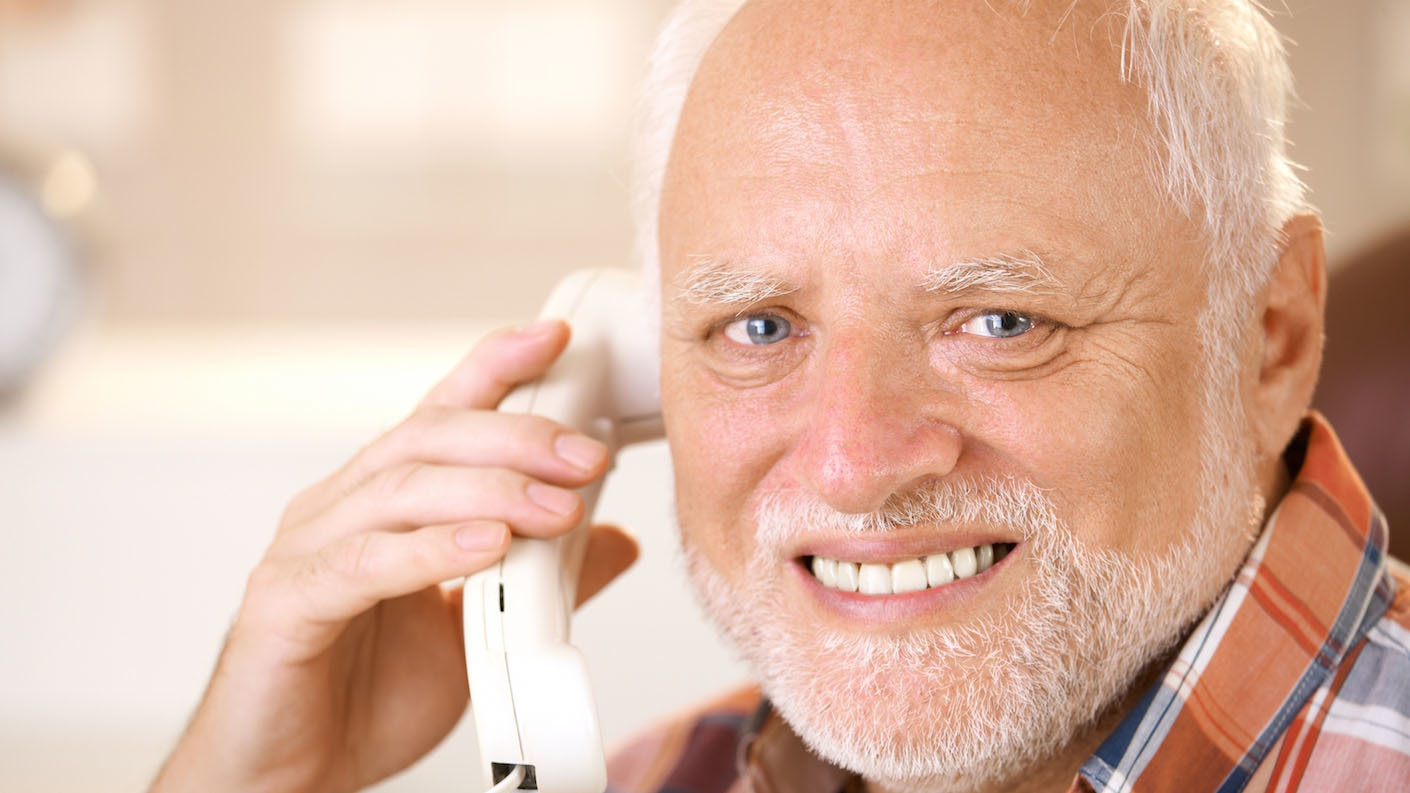

In [3]:
load_image(filename)